In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [90]:
df = pd.read_csv('heart_data.csv')
df.drop("Unnamed: 0", axis = 1, inplace = True)
df.head()

X = df.drop('heart.disease', axis = 1)
y = df['heart.disease'].to_numpy()

X.head()

,biking,smoking
0,30.801246,10.896608
1,65.129215,2.219563
2,1.959665,17.588331
3,44.800196,2.802559
4,69.428454,15.974505


In [91]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# df.min(skipna=False)

print((30.801246 - 1.119154) / (1.959665 - 1.119154))
print(4.02262007e-01 /  1.13908888e-02)

35.3143409187982
35.314365196858034


In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Input, InputLayer
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(InputLayer(input_shape = (X.shape[1], )))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate = 0.1))

print(model.summary())

history = model.fit(X_train, y_train, verbose = True, epochs = 30, validation_data=(X_test, y_test))

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
13/13 [==============================] - 0s 7ms/step - loss: 38.2527 - val_loss: 16.1139
Epoch 2/20
13/13 [==============================] - 0s 2ms/step - loss: 16.0643 - val_loss: 11.1277
Epoch 3/20
13/13 [==============================] - 0s 2ms/step - loss: 11.0246 - val_loss: 7.7982
Epoch 4/20
13/13 [==============================] - 0s 2ms/step - loss: 7.8665 - val_loss: 5.4148
Epoch 5/20
13/13 [==============================] - 0s 2ms/step - loss: 5.5224 - val_loss: 4.0397
Epoch 6/20
13/13 [==============================] - 0s 2ms/step - loss: 3.9837 - val_loss: 2.9270
Epoch 7/20
13/13 [==============================] - 0s 2

In [94]:
weights = model.layers[0].get_weights()[0]
biases = model.layers[0].get_weights()[1]
print(weights)
print(biases)

[[-14.7991705]
 [  5.261677 ]]
[14.886152]


In [105]:
prediction_test = model.predict(X_test)    
prediction_test

print("Mean sq. errror between y_test and predicted =", np.mean(prediction_test-y_test)**2)


Mean sq. errror between y_test and predicted = 0.006291499344845265


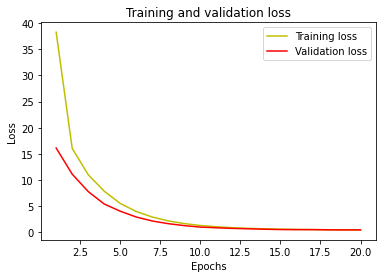

In [104]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()